# 2.2 - BoseEinsteinCondensate tutorial: Time dependent potentials

In this notebook we are going to illustrate how the potential works in the BoseEinsteinCondensate module. We start by initialising a 2 dimensional BoseEinsteinCondensate with dimensions 101x101. The factor bec.gamma is here set to be non-zero to introduce some dissipation to the model. This is important because the bec with $\gamma = 0$ conserves energy and will start misbehaving.


In [ ]:
import comfit as cf
import matplotlib.pyplot as plt
import numpy as np

### Task 1: initialise a bec in two dimensions with resolution 101 in x and y. Make gamma = 0.05 



Now we need to initialize the wavefunction. Before we do that we need to specify the potential. The potential is by default a function given as

self.V_ext = lambda: self.V0

You can change this constant directly, but we recomend using the function:

bec.conf_external_potential(V_ext, additive=False)

Here V_ext can be either be a constant, a matrix or a function. If additive = True the function adds V_ext to the existing potential.




In [ ]:
### First we set the size of the harmonic
R_tf = 40

### Here we set the size and velocity of the stirrer
stirrer_radius = 20
stirrer_velocity = 0.6
freq = stirrer_velocity/stirrer_radius
size =4
strength = .9

### Defining the function for the time-dependent potential
def V_t():
    pos_x = bec.xmid + stirrer_radius * np.cos(freq * bec.t)
    pos_y = bec.ymid + stirrer_radius * np.sin(freq * bec.t)
    stirrer = bec.calc_gaussian_stirring_potential(size, strength, [pos_x, pos_y])
    harmonic = bec.calc_harmonic_potential(R_tf)
    return   harmonic + stirrer



In [ ]:
### Task 2: Set the potential to the bec.t=0 value of the above function, initialise the Thomas Fermi 
# ground state and relax the system using the  evolve_relax(...) solver for 20 time steps





bec.plot_field(np.abs(bec.psi)**2,cmap_symmetric=False,colormap = 'winter')
plt.show()

Note that when the evolve_relax(...) function is running the potential is kept constant and the bec.time variable is not updated

In [ ]:

### Task 3: Updating the potential to the time-dependent function V_t() that we definded above


### Task 4: Evolve the system with the time-dependent potential using the ETD4RK scheme


### Task 5: Track the defects and their velocity and plot the result 



Now we set the potential to be time independent and run the system again. The non-zero bec.gamma are going to relax the system.


When working with a time dependent sysytem it is nice to make some movies. To do this one needs to use two functions. The first one is cf.tool_save_plot(n) wich saves the plot and label it as n. When all the plots is saved you can cal cf.tool_make_animation(N-1) which takes the figures labeled 0 - (N-1) and makes a plot. It also deletes the figures. The procedure for making a movie is therefore

for i in range(N):

    evolve(...)
    
    make_plot(...)
    
    cf.tool_save_plot(i)
   
cf.tool_make_animation(i) (notice indent)



In [ ]:
#### task 6. make an animation of the stirring potential. Evolve 10 or 20 timesteps between each frame for a total 
#### of 3000 or more timesteps.
#### Display both the absolute value squared of the wavefunction and track the vortices.  Notice that in
###  order to make the plots apear in the same axes you need to use:
###  ax = bec.plot_field(...)
###  bec.plot_vortex_nodes(nodes, ax) 

In [ ]:
bec.V0 = V_t()


bec.V_ext = lambda: bec.V0

In [ ]:
timesteps = 300
bec.evolve_dGPE(timesteps,'ETD4RK')

timesteps = int(200/bec.dt)
bec.plot_field(np.abs(bec.psi)**2,cmap_symmetric=False,colormap = 'winter')
plt.show()

Task 7 (optional): Do the task again, but implement your own time-dependent potential.  

# Solutions

In [2]:
import sys
sys.path.append('/Users/jonasronning/Documents/Work/Numerics/Old Projects/ComFiT')

import comfit as cf
import matplotlib.pyplot as plt
import numpy as np

### Task 1: initialise a bec in two dimensions with resolution 101 in x and y. Make gamma = 0.05 
bec = cf.BoseEinsteinCondensate(2,xRes=101,yRes=101,gamma=0.05,dt=0.1)

### First we set the size of the harmonic
R_tf = 40

### Here we set the size and velocity of the stirrer
stirrer_radius = 20
stirrer_velocity = 0.6
freq = stirrer_velocity/stirrer_radius
size =4
strength = .9

### Defining the function for the time-dependent potential
def V_t(t):
    pos_x = bec.xmid + stirrer_radius * np.cos(freq * t)
    pos_y = bec.ymid + stirrer_radius * np.sin(freq * t)
    stirrer = bec.calc_gaussian_stirring_potential(size, strength, [pos_x, pos_y])
    harmonic = bec.calc_harmonic_potential(R_tf)
    return   harmonic + stirrer


Relaxing the BoseEinsteinCondensate...


evolving the dGPE: 100%|███████████████████████| 50/50 [00:00<00:00, 796.22it/s]


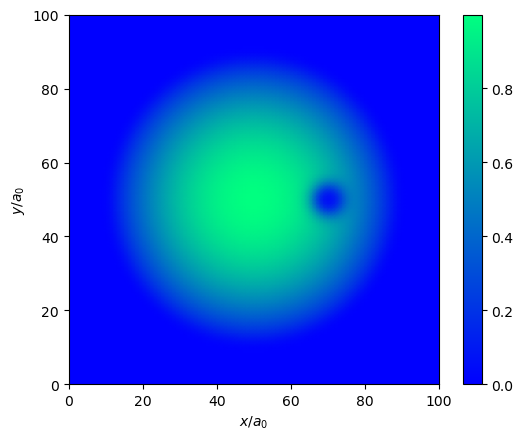

In [3]:
######## task 2 #########
bec.conf_external_potential(V_t, additive=False)

bec.conf_initial_condition_Thomas_Fermi()

bec.evolve_relax(50) 

bec.plot_field(np.abs(bec.psi)**2,cmap_symmetric=False,colormap = 'winter')
plt.show()

evolving the dGPE: 100%|███████████████████████| 30/30 [00:00<00:00, 303.73it/s]


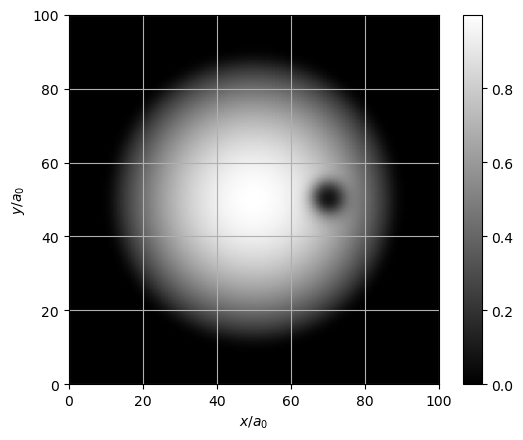

In [3]:
#### task  3, 4 and 5


bec.evolve_dGPE( 30, method='ETD4RK') 

nodes = bec.calc_vortex_nodes()

fig,ax=bec.plot_field(np.abs(bec.psi)**2,cmap_symmetric=False,colormap = 'gray')
bec.plot_vortex_nodes(nodes,ax)
plt.show()

In [5]:
### here is some code for making a video
N = 300
for n in range(N):
    bec.evolve_dGPE(10)
    fig,ax=bec.plot_field(abs(bec.psi)**2,colormap='gray',cmap_symmetric=False,
                clims=[0,1])
    nodes = bec.calc_vortex_nodes()
    bec.plot_vortex_nodes(nodes,ax)
    cf.tool_save_plot(n)


cf.tool_make_animation_gif(n)

In [ ]:
const_pot = V_t(bec.time)


bec.conf_external_potential(const_pot, additive=False)

timesteps = int(200/bec.dt)
bec.evolve_dGPE(timesteps,'ETD4RK')


bec.plot_field(np.abs(bec.psi)**2,cmap_symmetric=False,colormap = 'winter')
plt.show()